In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
import seaborn as sns
from math import  sqrt
from sklearn import metrics
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_excel('Data/VIC_USE.xlsx',index_col = 'Date',parse_dates= True)

df =df.drop(['Period'],axis =1 )


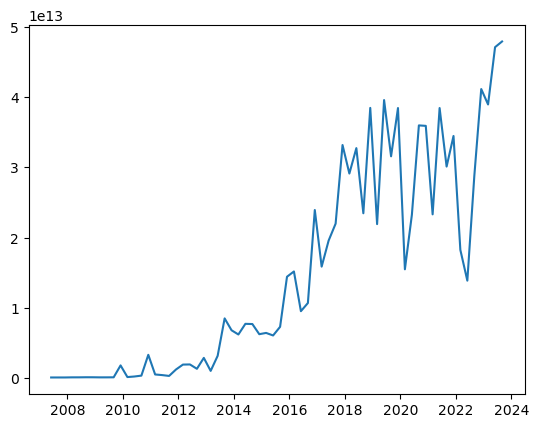

In [14]:
#df['Revenue'].plot(figsize=(10,5),color='red')

plt.plot(df['Revenue'])

# Descriptive Analysis

In [15]:
df.describe()


,Revenue,Debt,Equity,Asset,Profit,ROA,ROE,Debt ratio,Cost of goods sold
count,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,66.000000,66.000000,66.000000,6.600000e+01
mean,1.478854e+13,1.386671e+14,5.485678e+13,1.943554e+14,7.014005e+11,0.008685,0.036194,2.882918,1.106594e+13
std,1.495447e+13,1.367336e+14,5.557515e+13,1.891843e+14,1.283379e+12,0.015109,0.070747,1.164377,1.159602e+13
min,4.532480e+10,1.246686e+12,1.497934e+12,3.179824e+12,-5.964033e+12,-0.014000,-0.037500,0.676600,1.327137e+10
25%,1.034908e+12,2.726046e+13,6.842651e+12,3.551264e+13,9.599388e+10,0.002000,0.007950,2.163925,4.400205e+11
50%,8.081875e+12,8.715215e+13,3.108155e+13,1.182337e+14,4.680279e+11,0.004150,0.015650,2.918250,4.980687e+12
75%,2.757443e+13,2.269011e+14,1.217344e+14,3.525005e+14,1.095973e+12,0.009650,0.037025,3.411025,1.989527e+13
max,4.795586e+13,4.784448e+14,1.642971e+14,6.253873e+14,4.607397e+12,0.081000,0.384500,5.165900,3.664755e+13


In [16]:
print("Meadian \t")
df.median()

Meadian 	


Revenue               8.081875e+12
Debt                  8.715215e+13
Equity                3.108155e+13
Asset                 1.182337e+14
Profit                4.680279e+11
ROA                   4.150000e-03
ROE                   1.565000e-02
Debt ratio            2.918250e+00
Cost of goods sold    4.980687e+12
dtype: float64

In [17]:
print('Skewness\t')
df.skew()

Skewness	


Revenue               0.665835
Debt                  0.987758
Equity                0.653497
Asset                 0.814268
Profit               -1.286960
ROA                   3.294024
ROE                   3.691242
Debt ratio           -0.003188
Cost of goods sold    0.684623
dtype: float64

In [18]:
print('Kurtosis\t')
df.kurtosis()

Kurtosis	


Revenue               -0.954889
Debt                  -0.014890
Equity                -1.259626
Asset                 -0.635464
Profit                11.845014
ROA                   12.248567
ROE                   14.015801
Debt ratio            -0.333555
Cost of goods sold    -0.911625
dtype: float64

# Regression

In [19]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

x = df.drop(['Revenue'],axis =1 ).values
y = df['Revenue'].values



<Axes: >

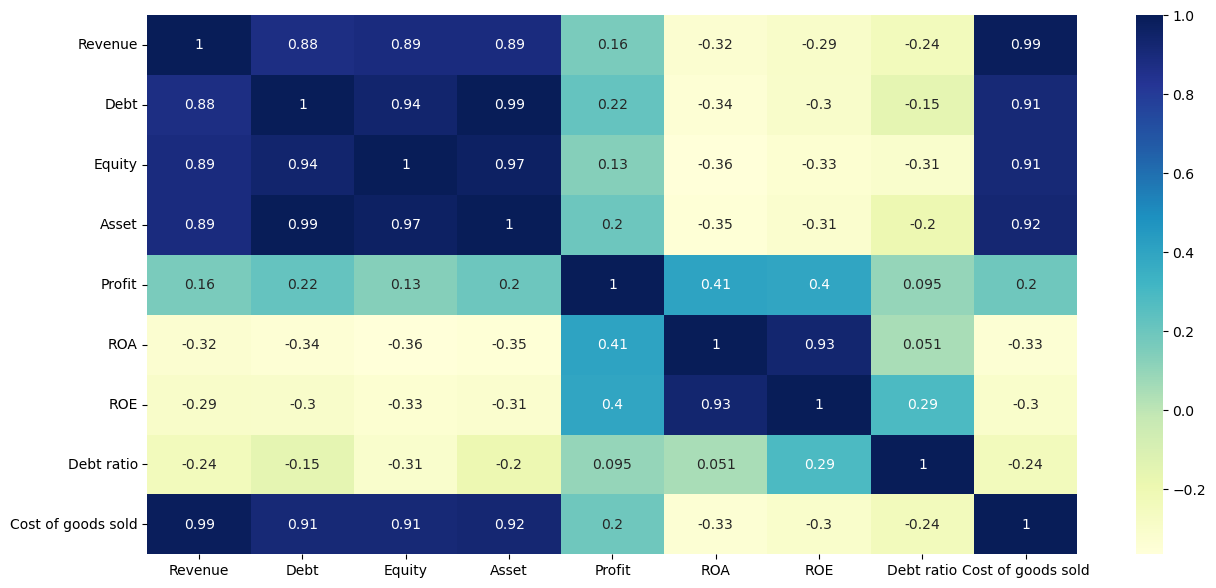

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot =True,cmap="YlGnBu")

In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy import stats

x = sm.add_constant(df[['Profit','Cost of goods sold','ROA','Debt ratio','ROE','Asset','Debt','Equity']])
print(x.corr())
est = sm.OLS(df['Revenue'], x)
est2 = est.fit()
print(est2.summary())

                    const    Profit  Cost of goods sold       ROA  Debt ratio  \
const                 NaN       NaN                 NaN       NaN         NaN   
Profit                NaN  1.000000            0.195364  0.406918    0.095446   
Cost of goods sold    NaN  0.195364            1.000000 -0.333981   -0.239135   
ROA                   NaN  0.406918           -0.333981  1.000000    0.050759   
Debt ratio            NaN  0.095446           -0.239135  0.050759    1.000000   
ROE                   NaN  0.395254           -0.303707  0.931670    0.287073   
Asset                 NaN  0.198709            0.922759 -0.350065   -0.197290   
Debt                  NaN  0.221247            0.911341 -0.337836   -0.151317   
Equity                NaN  0.133146            0.910371 -0.363956   -0.305672   

                         ROE     Asset      Debt    Equity  
const                    NaN       NaN       NaN       NaN  
Profit              0.395254  0.198709  0.221247  0.133146  
Cost o

# Remove Asset, Debt , Equity

In [10]:
x = sm.add_constant(df[['Profit','Cost of goods sold','ROA','Debt ratio','ROE']])
print(x.corr())
est = sm.OLS(df['Revenue'], x)
est2 = est.fit()
print(est2.summary())

                    const    Profit  Cost of goods sold       ROA  Debt ratio  \
const                 NaN       NaN                 NaN       NaN         NaN   
Profit                NaN  1.000000            0.195364  0.406918    0.095446   
Cost of goods sold    NaN  0.195364            1.000000 -0.333981   -0.239135   
ROA                   NaN  0.406918           -0.333981  1.000000    0.050759   
Debt ratio            NaN  0.095446           -0.239135  0.050759    1.000000   
ROE                   NaN  0.395254           -0.303707  0.931670    0.287073   

                         ROE  
const                    NaN  
Profit              0.395254  
Cost of goods sold -0.303707  
ROA                 0.931670  
Debt ratio          0.287073  
ROE                 1.000000  
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:  

In [11]:
new_df=df[['Profit','Cost of goods sold','ROA','Debt ratio','ROE','Revenue']]
X =new_df.drop(['Revenue'],axis = 1)
y = new_df['Revenue']

In [12]:
X

,Profit,Cost of goods sold,ROA,Debt ratio,ROE
Date,,,,,
2007-06-01,38238719051,13513817351,0.0120,0.6766,0.0208
2007-09-01,89551263843,13898052663,0.0282,0.6766,0.0486
2007-12-01,130999040742,13527397768,0.0412,0.6766,0.0711
2008-03-01,38352091769,14962440829,0.0121,0.6766,0.0208
2008-06-01,39943381469,16369404858,0.0126,0.6766,0.0217
...,...,...,...,...,...
2022-09-01,946780920767,22984051913807,0.0017,3.0486,0.0069
2022-12-01,1558987034231,28363382723758,0.0027,3.2386,0.0115
2023-03-01,1066234558673,34528470114466,0.0018,3.3788,0.0078


## Linear regression

In [13]:
y

Date
2007-06-01       45324800612
2007-09-01       46363273434
2007-12-01       46906485613
2008-03-01       62798781793
2008-06-01       64585429647
                   ...      
2022-09-01    28791593756012
2022-12-01    41172042654108
2023-03-01    38974697766325
2023-06-01    47144184097422
2023-09-01    47955856622345
Name: Revenue, Length: 66, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_test =X_test.sort_index(ascending=True)
X_test

,Profit,Cost of goods sold,ROA,Debt ratio,ROE
Date,,,,,
2008-06-01,39943381469,16369404858,0.0126,0.6766,0.0217
2014-06-01,858797477324,4796431234808,0.0095,3.0987,0.0421
2014-09-01,889282247109,4828614869306,0.0098,3.0987,0.0436
2015-03-01,427940707867,4150919802623,0.0045,2.4368,0.0153
2015-09-01,255122955903,4527987359168,0.0020,2.9827,0.0081
2015-12-01,187389406140,9807071905577,0.0013,2.8997,0.0050
2016-03-01,609916144077,10855833629589,0.0040,2.6966,0.0150
2017-06-01,1139227535170,13422144429746,0.0059,3.3988,0.0260
2018-09-01,613753250903,16883408480611,0.0023,1.7340,0.0063


array([[<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Cost of goods sold'}>],
       [<Axes: title={'center': 'ROA'}>,
        <Axes: title={'center': 'Debt ratio'}>],
       [<Axes: title={'center': 'ROE'}>,
        <Axes: title={'center': 'Revenue'}>]], dtype=object)

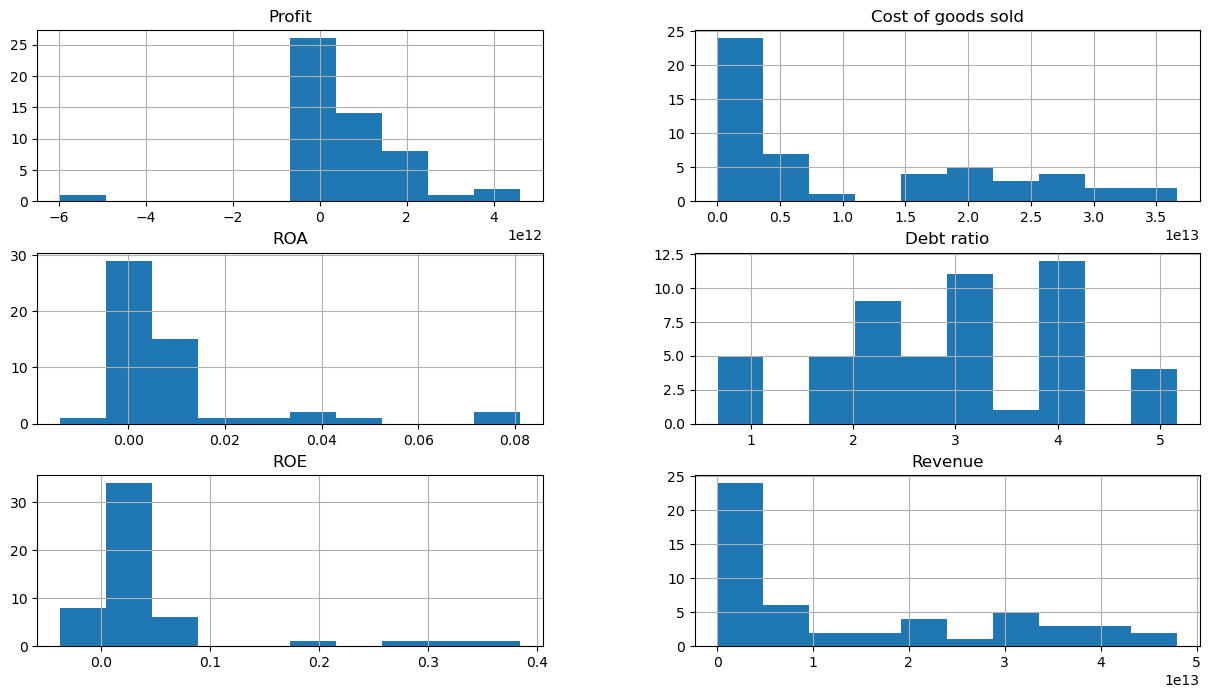

In [16]:
train_data =X_train.join(y_train)
train_data.hist(figsize =(15,8))

In [17]:
train_data= train_data.sort_index(ascending = True)
train_data

,Profit,Cost of goods sold,ROA,Debt ratio,ROE,Revenue
Date,,,,,,
2007-06-01,38238719051,13513817351,0.0120,0.6766,0.0208,45324800612
2007-09-01,89551263843,13898052663,0.0282,0.6766,0.0486,46363273434
2007-12-01,130999040742,13527397768,0.0412,0.6766,0.0711,46906485613
2008-03-01,38352091769,14962440829,0.0121,0.6766,0.0208,62798781793
2008-09-01,37469183532,15187759687,0.0118,0.6766,0.0203,76624535356
2008-12-01,6266186413,13942194781,0.0010,2.9368,0.0042,74390568161
2009-03-01,11562949869,13271369445,0.0008,5.1659,0.0056,61113201638
2009-06-01,55034439200,15496863180,0.0038,5.1659,0.0266,62569869999
2009-09-01,95780841945,22111106633,0.0067,5.1659,0.0463,69792134537


In [18]:

X_train, y_train = train_data.drop(['Revenue'],axis=1),train_data['Revenue']


reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [19]:
X_train

,Profit,Cost of goods sold,ROA,Debt ratio,ROE
Date,,,,,
2007-06-01,38238719051,13513817351,0.0120,0.6766,0.0208
2007-09-01,89551263843,13898052663,0.0282,0.6766,0.0486
2007-12-01,130999040742,13527397768,0.0412,0.6766,0.0711
2008-03-01,38352091769,14962440829,0.0121,0.6766,0.0208
2008-09-01,37469183532,15187759687,0.0118,0.6766,0.0203
2008-12-01,6266186413,13942194781,0.0010,2.9368,0.0042
2009-03-01,11562949869,13271369445,0.0008,5.1659,0.0056
2009-06-01,55034439200,15496863180,0.0038,5.1659,0.0266
2009-09-01,95780841945,22111106633,0.0067,5.1659,0.0463


In [20]:
test_data =X_test.join(y_test)
test_data =test_data.sort_index(ascending=True)
test_data

,Profit,Cost of goods sold,ROA,Debt ratio,ROE,Revenue
Date,,,,,,
2008-06-01,39943381469,16369404858,0.0126,0.6766,0.0217,64585429647
2014-06-01,858797477324,4796431234808,0.0095,3.0987,0.0421,7693765313144
2014-09-01,889282247109,4828614869306,0.0098,3.0987,0.0436,7664553124925
2015-03-01,427940707867,4150919802623,0.0045,2.4368,0.0153,6398273675260
2015-09-01,255122955903,4527987359168,0.0020,2.9827,0.0081,7268427623497
2015-12-01,187389406140,9807071905577,0.0013,2.8997,0.0050,14409259141830
2016-03-01,609916144077,10855833629589,0.0040,2.6966,0.0150,15161634012251
2017-06-01,1139227535170,13422144429746,0.0059,3.3988,0.0260,19567013068557
2018-09-01,613753250903,16883408480611,0.0023,1.7340,0.0063,23460387988882


In [21]:
X_test , y_test = test_data.drop(['Revenue'],axis=1), test_data['Revenue']

In [22]:
X_test

,Profit,Cost of goods sold,ROA,Debt ratio,ROE
Date,,,,,
2008-06-01,39943381469,16369404858,0.0126,0.6766,0.0217
2014-06-01,858797477324,4796431234808,0.0095,3.0987,0.0421
2014-09-01,889282247109,4828614869306,0.0098,3.0987,0.0436
2015-03-01,427940707867,4150919802623,0.0045,2.4368,0.0153
2015-09-01,255122955903,4527987359168,0.0020,2.9827,0.0081
2015-12-01,187389406140,9807071905577,0.0013,2.8997,0.0050
2016-03-01,609916144077,10855833629589,0.0040,2.6966,0.0150
2017-06-01,1139227535170,13422144429746,0.0059,3.3988,0.0260
2018-09-01,613753250903,16883408480611,0.0023,1.7340,0.0063


In [23]:
reg.score(X_test,y_test)

0.9602771701027046

In [24]:
y_train= y_train.sort_index(ascending = True)
y_train

Date
2007-06-01       45324800612
2007-09-01       46363273434
2007-12-01       46906485613
2008-03-01       62798781793
2008-09-01       76624535356
2008-12-01       74390568161
2009-03-01       61113201638
2009-06-01       62569869999
2009-09-01       69792134537
2009-12-01     1766613326993
2010-03-01      104359229566
2010-06-01      183273552648
2010-09-01      309645289817
2010-12-01     3275701709234
2011-03-01      473957252210
2011-06-01      386090094150
2011-09-01      266633362762
2011-12-01     1187059072608
2012-03-01     1882776152019
2012-06-01     1903618535135
2012-09-01     1282743436221
2012-12-01     2838878303068
2013-03-01      984191397336
2013-06-01     3131813588420
2013-09-01     8469983770011
2013-12-01     6777132400693
2014-03-01     6175539052490
2014-12-01     6217475955881
2015-06-01     6035578292221
2016-06-01     9498055197592
2016-09-01    10661516783908
2016-12-01    23922923974788
2017-03-01    15850567158886
2017-09-01    21979764021964
2017-12-0

In [25]:
y_pred= reg.predict(X_test)  
x_pred= reg.predict(X_train) 

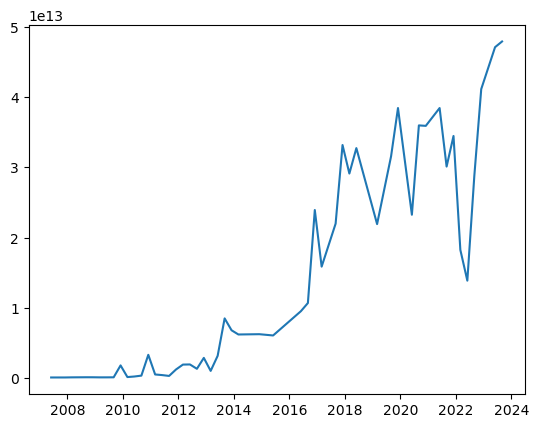

In [26]:
plt.plot(y_train)

In [27]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred,'Diff':y_test-y_pred})

reg_model_diff

,Actual value,Predicted value,Diff
Date,,,
2008-06-01,64585429647,3.709199e+11,-3.063344e+11
2014-06-01,7693765313144,6.436591e+12,1.257175e+12
2014-09-01,7664553124925,6.472523e+12,1.192030e+12
2015-03-01,6398273675260,5.581855e+12,8.164183e+11
2015-09-01,7268427623497,6.156671e+12,1.111757e+12
2015-12-01,14409259141830,1.312756e+13,1.281702e+12
2016-03-01,15161634012251,1.432715e+13,8.344839e+11
2017-06-01,19567013068557,1.753255e+13,2.034461e+12
2018-09-01,23460387988882,2.212420e+13,1.336189e+12


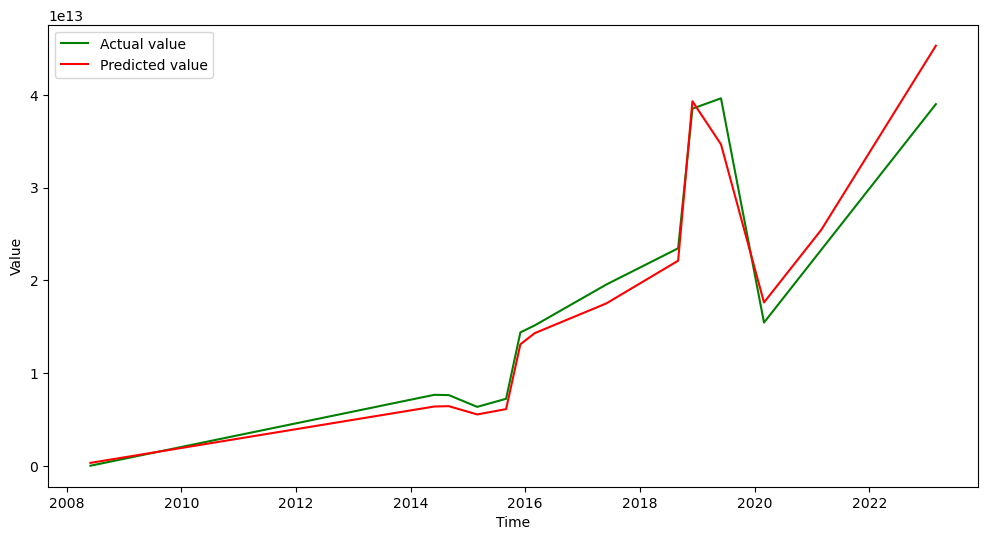

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(reg_model_diff['Actual value'], label='Actual value', color='green')
plt.plot(reg_model_diff['Predicted value'],  label='Predicted value', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted')

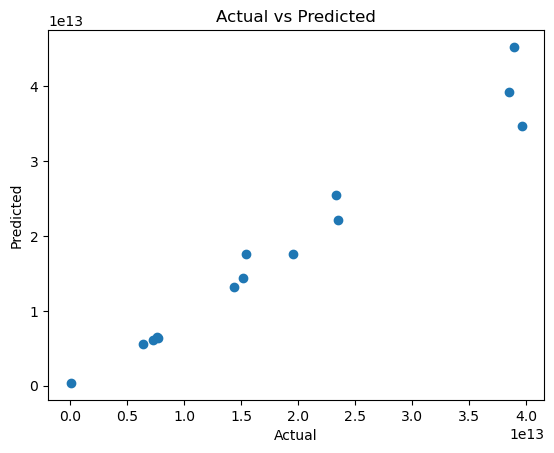

In [29]:
plt.scatter(reg_model_diff['Actual value'],reg_model_diff['Predicted value'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
forest.score(X_test,y_test)

0.9340197417714583

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    "n_estimators":[ 300,400,500],
    "min_samples_split":[2,4],
    "max_depth":[None, 4, 8]
    
}
grid_search =GridSearchCV(forest,param_grid,cv= 5,scoring="neg_mean_squared_error",return_train_score=True
                         
                         )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [300, 400, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=500)

In [34]:
grid_search.best_estimator_.score(X_test,y_test)

0.9499351631860615

In [35]:
y_forest_pred= forest.predict(X_test)  
x_forest_pred= forest.predict(X_train) 

In [36]:
forest_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_forest_pred,'Diff':y_test-y_forest_pred})
forest_model_diff

,Actual value,Predicted value,Diff
Date,,,
2008-06-01,64585429647,6.366845e+10,9.169754e+08
2014-06-01,7693765313144,7.017845e+12,6.759207e+11
2014-09-01,7664553124925,7.114176e+12,5.503776e+11
2015-03-01,6398273675260,6.411011e+12,-1.273775e+10
2015-09-01,7268427623497,7.101979e+12,1.664488e+11
2015-12-01,14409259141830,1.472822e+13,-3.189569e+11
2016-03-01,15161634012251,1.449165e+13,6.699888e+11
2017-06-01,19567013068557,1.982320e+13,-2.561867e+11
2018-09-01,23460387988882,2.441088e+13,-9.504956e+11


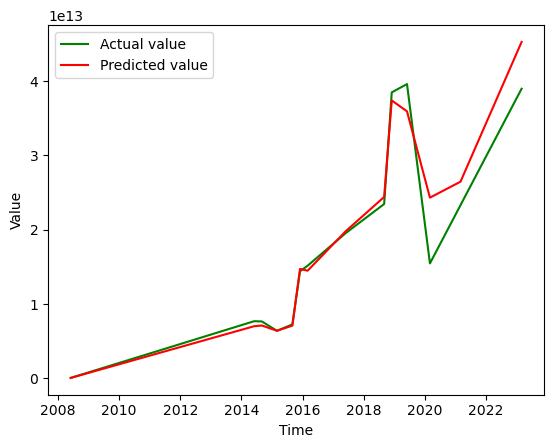

In [37]:
plt.plot(forest_model_diff['Actual value'], label='Actual value', color='green')
plt.plot(forest_model_diff['Predicted value'],  label='Predicted value', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted')

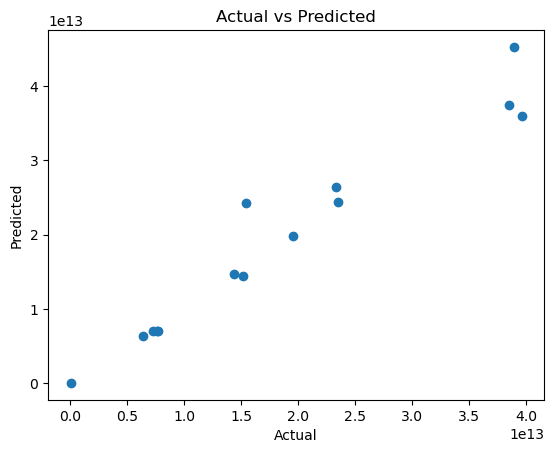

In [38]:
plt.scatter(forest_model_diff['Actual value'],forest_model_diff['Predicted value'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

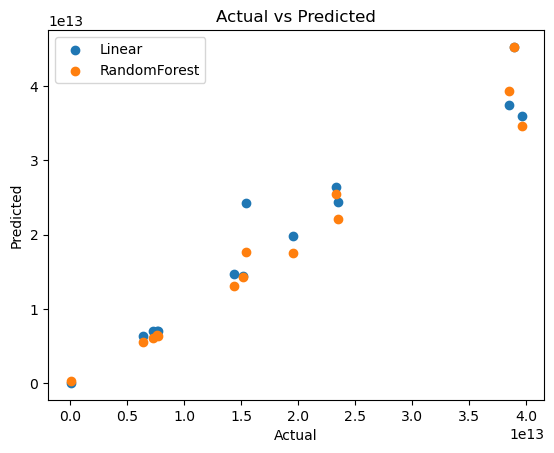

In [39]:

plt.scatter(forest_model_diff['Actual value'],forest_model_diff['Predicted value'], label ='Linear')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.scatter(reg_model_diff['Actual value'],reg_model_diff['Predicted value'],label = 'RandomForest')
plt.legend()


In [40]:
rmse_linear = sqrt(mean_squared_error(y_test,y_pred))
rmse_forest = sqrt(mean_squared_error(y_test,y_forest_pred))
print(rmse_linear)
print(rmse_forest)

2496311043295.8857
3217255953287.081


# ARIMA model

In [41]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest= adfuller(dataset,autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. p-value : ",dftest[1])
    print("3. Num of lags : ",dftest[2])
    print("4. Num of observations used for ADF regression and critical values calculation : ",dftest[3])
    print("5. Critical values : ")
    for key, val in dftest[4].items():
        print("\t",key, ": ",val)
        

In [42]:
print("REVENUE:\t")

ad_test(df['Revenue'])


REVENUE:	
1. ADF :  0.41301165574229387
2. p-value :  0.9819750628970123
3. Num of lags :  7
4. Num of observations used for ADF regression and critical values calculation :  58
5. Critical values : 
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944


<Axes: xlabel='Date'>

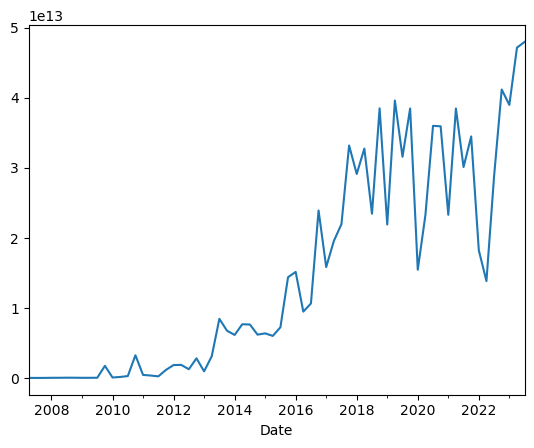

In [43]:
df['Revenue'].plot()

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

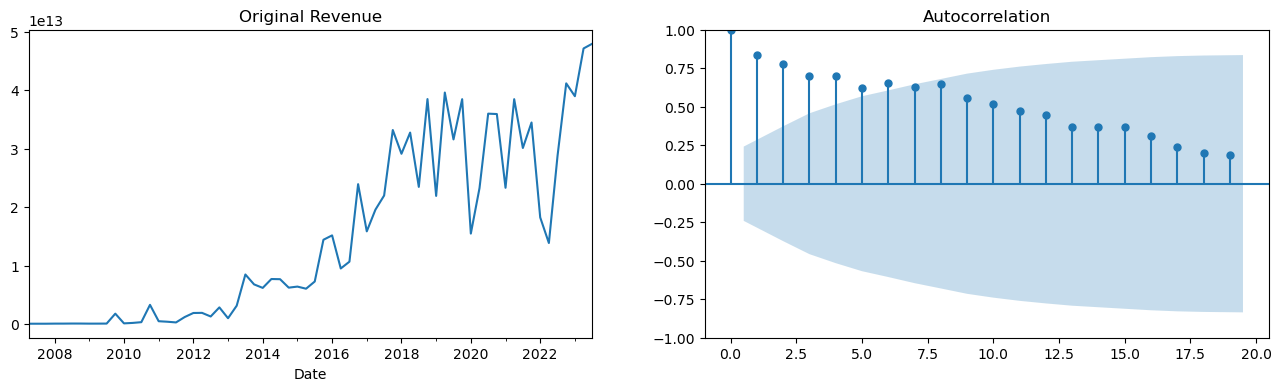

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,4))
df['Revenue'].plot(ax=ax1)
ax1.set_title('Original Revenue')
plot_acf(df['Revenue'],ax = ax2);

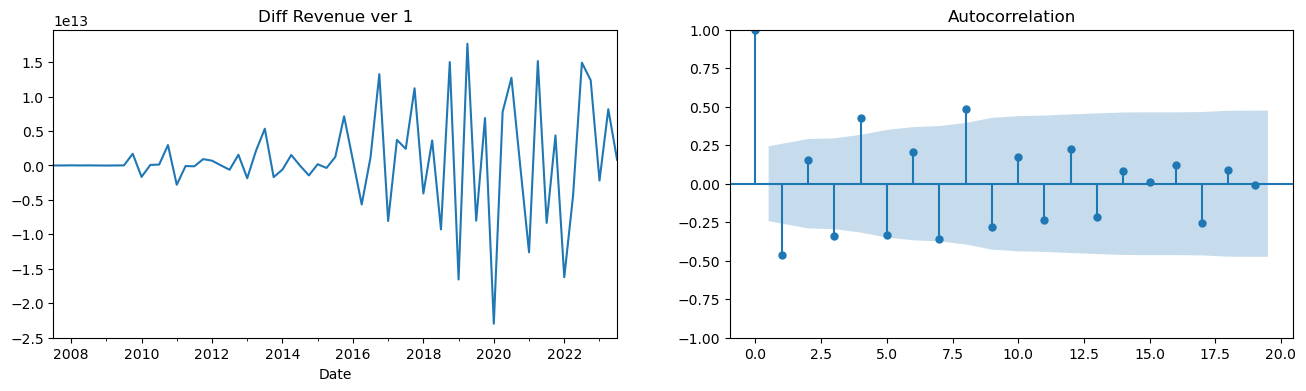

In [46]:
diff_Revenue_v1 = (df['Revenue'].diff()).dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,4))
diff_Revenue_v1.plot(ax=ax1)
ax1.set_title('Diff Revenue ver 1')
plot_acf(diff_Revenue_v1,ax = ax2);

In [47]:
ad_test(diff_Revenue_v1)

1. ADF :  -4.331471700927393
2. p-value :  0.00039165282413017695
3. Num of lags :  6
4. Num of observations used for ADF regression and critical values calculation :  58
5. Critical values : 
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944


<Axes: xlabel='Date'>

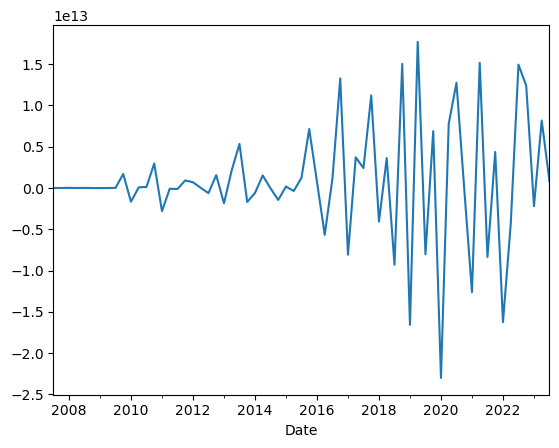

In [48]:
diff_Revenue_v1.plot()

In [49]:
from pmdarima.arima.utils import ndiffs
ndiffs(df['Revenue'],test ="adf")

1

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf

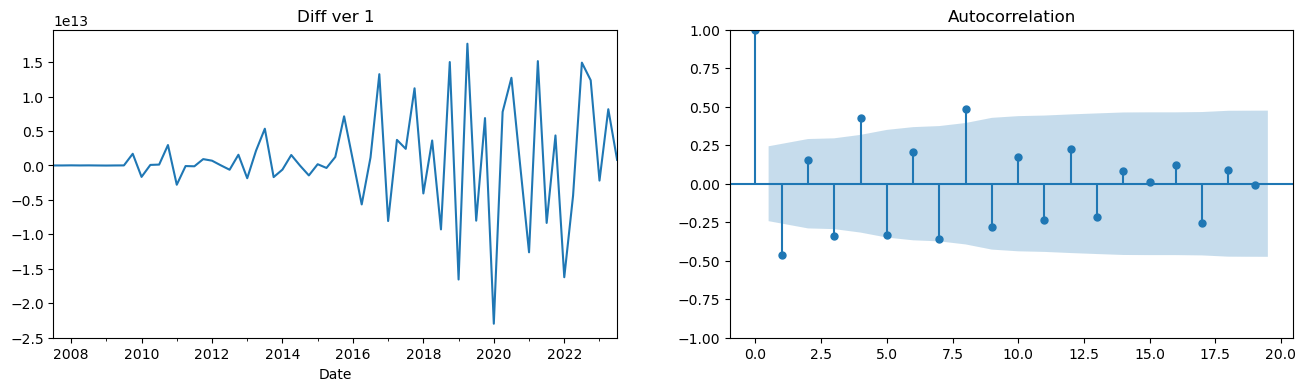

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
diff_Revenue_v1.plot(ax =ax1)
ax1.set_title("Diff ver 1")
ax2.set_ylim(0,1)
plot_acf(diff_Revenue_v1,ax=ax2);

# acf 1

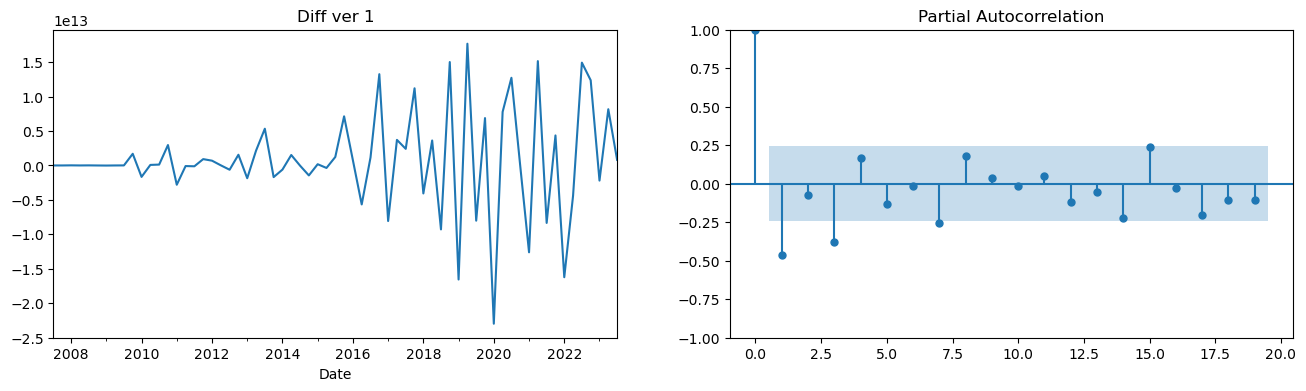

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
diff_Revenue_v1.plot(ax =ax1)
ax1.set_title("Diff ver 1")
ax2.set_ylim(0,1)
plot_pacf(diff_Revenue_v1,ax=ax2);

# PACF 1

In [53]:
n = int(len(df)*0.8)
train = df[:n]
test = df[n:]
train

,Revenue,Debt,Equity,Asset,Profit,ROA,ROE,Debt ratio,Cost of goods sold
Date,,,,,,,,,
2007-06-01,45324800612,1246686428991,1842705052935,3179823754676,38238719051,0.0120,0.0208,0.6766,13513817351
2007-09-01,46363273434,1246686428991,1842705052935,3179823754676,89551263843,0.0282,0.0486,0.6766,13898052663
2007-12-01,46906485613,1246686428991,1842705052935,3179823754676,130999040742,0.0412,0.0711,0.6766,13527397768
2008-03-01,62798781793,1246686428991,1842705052935,3179823754676,38352091769,0.0121,0.0208,0.6766,14962440829
2008-06-01,64585429647,1246686428991,1842705052935,3179823754676,39943381469,0.0126,0.0217,0.6766,16369404858
2008-09-01,76624535356,1246686428991,1842705052935,3179823754676,37469183532,0.0118,0.0203,0.6766,15187759687
2008-12-01,74390568161,4399063295606,1497934279555,6021566399923,6266186413,0.0010,0.0042,2.9368,13942194781
2009-03-01,61113201638,10677630442971,2066943051408,14313365056807,11562949869,0.0008,0.0056,5.1659,13271369445
2009-06-01,62569869999,10677630442971,2066943051408,14313365056807,55034439200,0.0038,0.0266,5.1659,15496863180


In [54]:

from statsmodels.tsa.arima.model import ARIMA
import pmdarima  as pm
import warnings
warnings.filterwarnings("ignore")

In [55]:
model = ARIMA(df['Revenue'],order=(1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   66
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2010.318
Date:                Fri, 17 Nov 2023   AIC                           4026.636
Time:                        19:21:57   BIC                           4033.159
Sample:                    06-01-2007   HQIC                          4029.210
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0502      0.184     -0.272      0.785      -0.411       0.311
ma.L1         -0.4805      0.172     -2.787      0.005      -0.819      -0.143
sigma2      4.616e+25   8.69e-28   5.31e+52      0.000    4.62e+25    4.62e+25
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 9.79
Prob(Q):                              0.72   Prob(JB):                         0.01
Heteroskedasticity (H):             119.81   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+69. Standard errors may be unstable.
"""

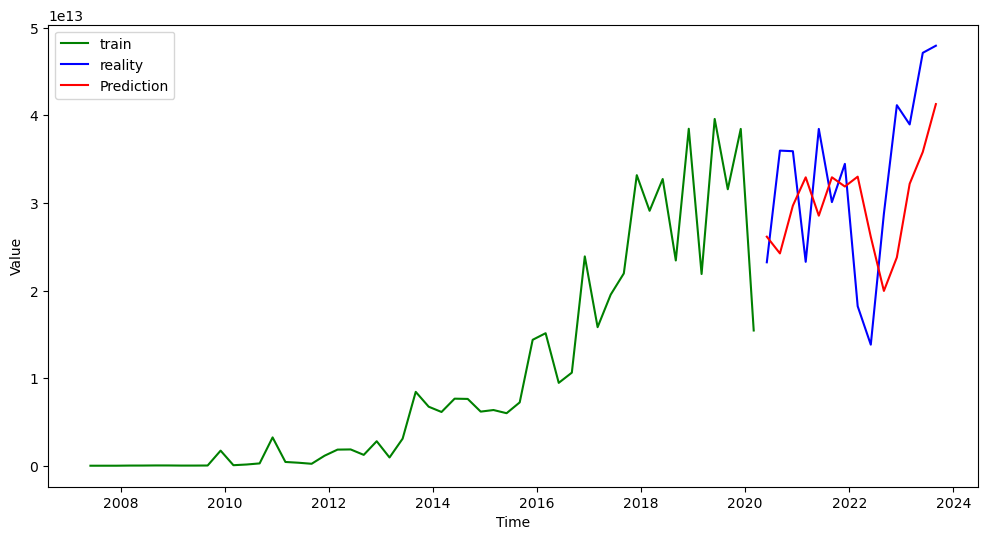

In [56]:
start = len(train)
end = len(train)+ len(test) -1 
pred = result.predict(start = start , end = end, type = 'levels')
fu_end = len(train)+ len(test) +len(train) 
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Revenue'], label='train', color='green')
plt.plot(test.index, test['Revenue'], label='reality', color='blue')
plt.plot(test.index, pred, label='Prediction', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [57]:


from math import  sqrt
mae = mean_absolute_error(test['Revenue'],pred)
rmse = sqrt(mean_squared_error(test['Revenue'],pred))
print("Mae: ",round(mae, 3))
print("RMSE: ",round(rmse, 3))

Mae:  8841938203196.09
RMSE:  9844788304887.445


In [58]:
best_model = pm.auto_arima(train['Revenue'], start_p=0, start_q=0,
                      test='adf',       
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3147.695, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3087.831, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3112.973, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3088.820, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3074.234, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3066.291, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3114.004, Time=0.02 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3067.066, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=3063.066, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3118.715, Time=0.03 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=3063.766, Time=0.14 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=3058.921, Time=0.19 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=3124.777, Time=0.05 sec
 ARIMA(2,2,4)(0,0,0)[0]             : 

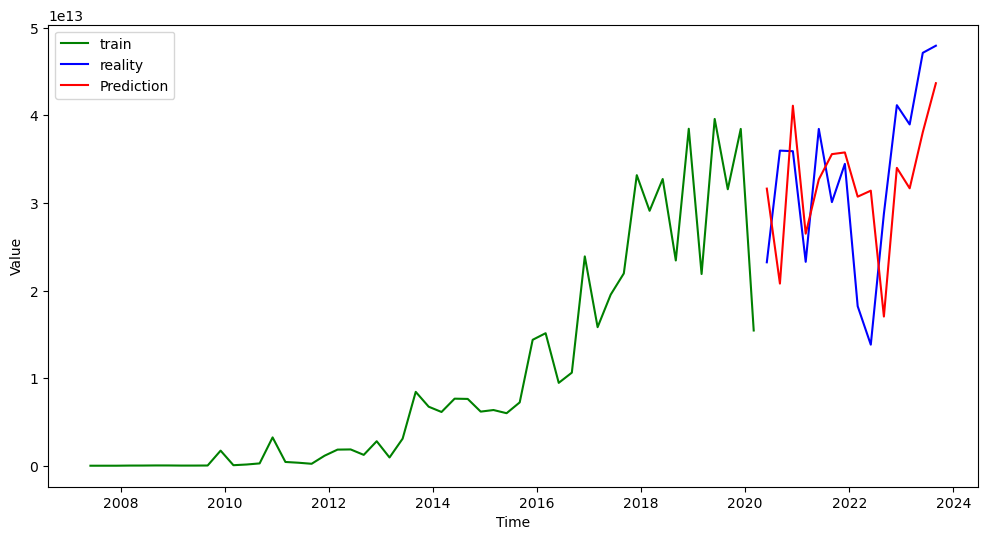

In [59]:
best_model = ARIMA(df['Revenue'],order=(4,2,3))

best_result = best_model.fit()
best_pred = best_result.predict(start = start , end = end, type = 'levels')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Revenue'], label='train', color='green')
plt.plot(test.index, test['Revenue'], label='reality', color='blue')
plt.plot(test.index, best_pred, label='Prediction', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [60]:
mae = mean_absolute_error(test['Revenue'],best_pred)
rmse = sqrt(mean_squared_error(test['Revenue'],best_pred))
print("Mae: ",round(mae, 3))
print("RMSE: ",round(rmse, 3))

Mae:  8148443088638.814
RMSE:  9295572715441.896


In [61]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
model = ARIMA(df['Revenue'], order=(4, 2, 3))  
fitted = model.fit()
future= fitted.forecast(15, alpha=0.05)



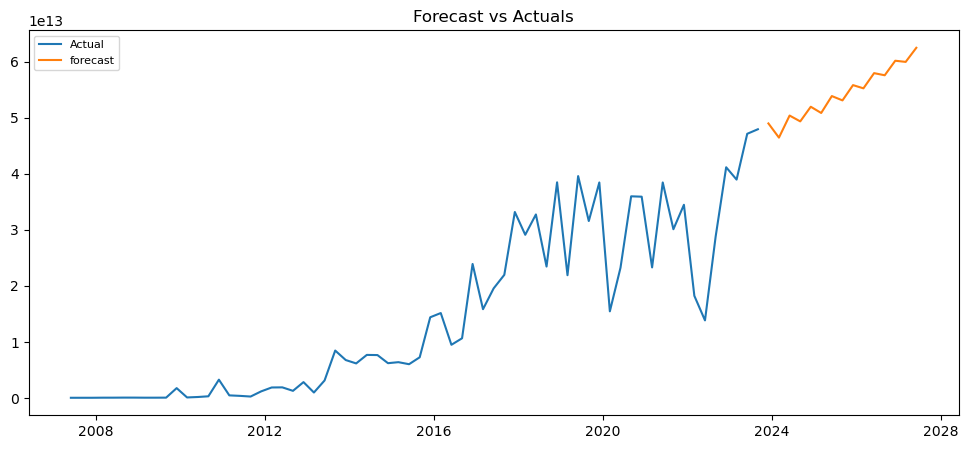

In [71]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Revenue'],label ='Actual')
plt.plot(future, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [72]:
print(future)

2023-12-01    4.899130e+13
2024-03-01    4.646188e+13
2024-06-01    5.039790e+13
2024-09-01    4.935924e+13
2024-12-01    5.196979e+13
2025-03-01    5.085845e+13
2025-06-01    5.387511e+13
2025-09-01    5.310345e+13
2025-12-01    5.582915e+13
2026-03-01    5.525465e+13
2026-06-01    5.796620e+13
2026-09-01    5.758620e+13
2026-12-01    6.017930e+13
2027-03-01    5.997267e+13
2027-06-01    6.249135e+13
Freq: QS-DEC, Name: predicted_mean, dtype: float64
